# 1. Summary <a class= 'anchor' id = summary_1></a>
The goal of the "Bangladesh AQI Prediction" project is to create a predictive model to calculate the Air Quality Index (AQI) at various points in Bangladesh. The dataset for the study was provided by the Environmental Office in Dhaka.For the years 2020 to 2022, hourly air quality statistics are included in the dataset.

# 2. Ask Phase <a class= 'anchor' id = ask_phase_2></a>
## 2.1 Business Task <a class= 'anchor' id = business_task_2_1></a>
The major goal of this project is to provide a user-friendly website that allows users to estimate the AQI in their immediate environment by entering values for the nowcast concentration, the AQI, the month, and the day. The model will produce the correct AQI category based on these inputs, showing the amount of air quality - whether it is "Unhealthy," "Very Unhealthy," "Hazardous," "Unknown," "Unhealthy for Sensitive Groups," "Moderate," or "Good."

# 3. Prepare Phase <a class= 'anchor' id = prepare_phase_3></a>
.

## 3.3 Information About Our Dataset <a class= 'anchor' id = information_about_our_dataset_3_3></a>
The dataset provides valuable information about air quality in Bangladesh over multiple years. It allows us to observe trends, fluctuations, and patterns in AQI levels for various locations. Merging datasets from 2020 to 2022 facilitates a focus on the present trend and ensures data integrity.

## 3.4 Data Organization and Verification <a class= 'anchor' id = data_organization_and_verification_3_4></a>
The data has been organized and preprocessed to ensure its suitability for model building. Any missing or erroneous values have been handled appropriately to maintain data integrity.

## 3.5 Data Credibility and Integrity <a class= 'anchor' id = data_credibility_and_integrity_3_5></a>
The credibility of the dataset is established by its source (Kaggle) and the fact that it contains real-world air quality measurements. By merging data from multiple years, we enhance the dataset's integrity and improve the model's ability to capture long-term patterns and trends in AQI.

# 3.6 Model Development<a class= 'anchor' id = md></a>
To create an accurate and reliable predictive model, several techniques have been employed:
- Correlation Matrix and Heatmap: These visualization tools were used to assess multicollinearity among features and identify the most significant predictors of AQI.
- Recursive Feature Elimination with Cross-Validation (RFECV): RFECV helped select the most relevant features by recursively fitting the model and removing less important features.
- Random Forest Regressor: The model was trained using the Random Forest Regressor, an ensemble learning algorithm known for its ability to handle complex data and capture nonlinear relationships.
- R2 Score: The model's performance was evaluated using the R2 score, which measures how well the model predicts the variance in AQI values.



# 4. Process Phase <a class= 'anchor' id = process_phase_4></a>

## 4.1 Installing packages and opening libraries<a class= 'anchor' id = installing_packages_and_opening_libraries_4_1></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns


## 4.2 Importing and previewing our dataset<a class= 'anchor' id = importing_datasets_4_2></a>

In [ ]:
#loading the dataset/kaggle/input/dhaka-bangladesh-hourly-air-quality-20162022/Dhaka_PM2.5_2022.csv')
df_2020 = pd.read_csv('/content/Dhaka_PM2.5_2020 (1) (1).csv')
df_2021 = pd.read_csv('/content/Dhaka_PM2.5_2021 (1).csv')
df_2022 = pd.read_csv('/content/Dhaka_PM2.5_2022 (1).csv')



In [ ]:
#concatenating for further use
df = pd.concat([df_2022,df_2021,df_2020])
df.head()

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20420 entries, 0 to 8536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date (LT)      20420 non-null  object 
 1   Hour           20420 non-null  int64  
 2   NowCast Conc.  20420 non-null  float64
 3   Raw Conc.      20420 non-null  int64  
 4   Conc. Unit     20420 non-null  object 
 5   AQI            20420 non-null  int64  
 6   AQI Category   20373 non-null  object 
 7   QC Name        20420 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.4+ MB


## 4.3 Cleaning & Formatting<a class= 'anchor' id = cleaning_and_formatting_4_3></a>


In [ ]:
df.columns= df.columns.str.lower()

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.head()

,date_(lt),hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [ ]:
df.rename(columns={'date_(lt)': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20420 entries, 0 to 8536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20420 non-null  datetime64[ns]
 1   hour           20420 non-null  int64         
 2   nowcast_conc.  20420 non-null  float64       
 3   raw_conc.      20420 non-null  int64         
 4   conc._unit     20420 non-null  object        
 5   aqi            20420 non-null  int64         
 6   aqi_category   20373 non-null  object        
 7   qc_name        20420 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.4+ MB


converted to date time

In [ ]:
df.isnull().sum()

date              0
hour              0
nowcast_conc.     0
raw_conc.         0
conc._unit        0
aqi               0
aqi_category     47
qc_name           0
dtype: int64

In [ ]:
df['aqi_category'].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

date             0
hour             0
nowcast_conc.    0
raw_conc.        0
conc._unit       0
aqi              0
aqi_category     0
qc_name          0
dtype: int64

looks good

In [ ]:
df.columns

Index(['date', 'hour', 'nowcast_conc.', 'raw_conc.', 'conc._unit', 'aqi',
       'aqi_category', 'qc_name'],
      dtype='object')

In [ ]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


## 4.4 EDA/Feature Engineering<a class= 'anchor' id = EDA></a>

In [ ]:
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


In [ ]:
df.drop(columns = 'qc_name', inplace = True)

## 4.4.1 Handling Categorical Data<a class= 'anchor' id = HCD></a>

**Label encoding of our target label**

Since, its an ordinal category so we have to label encode it

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

In [ ]:
df['aqi_le'] = LE.fit_transform(df['aqi_category'])

In [ ]:
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,month,day,aqi_le
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,1,1,3
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,1,1,3
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,1,1,3
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,1,1,3
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,1,1,3


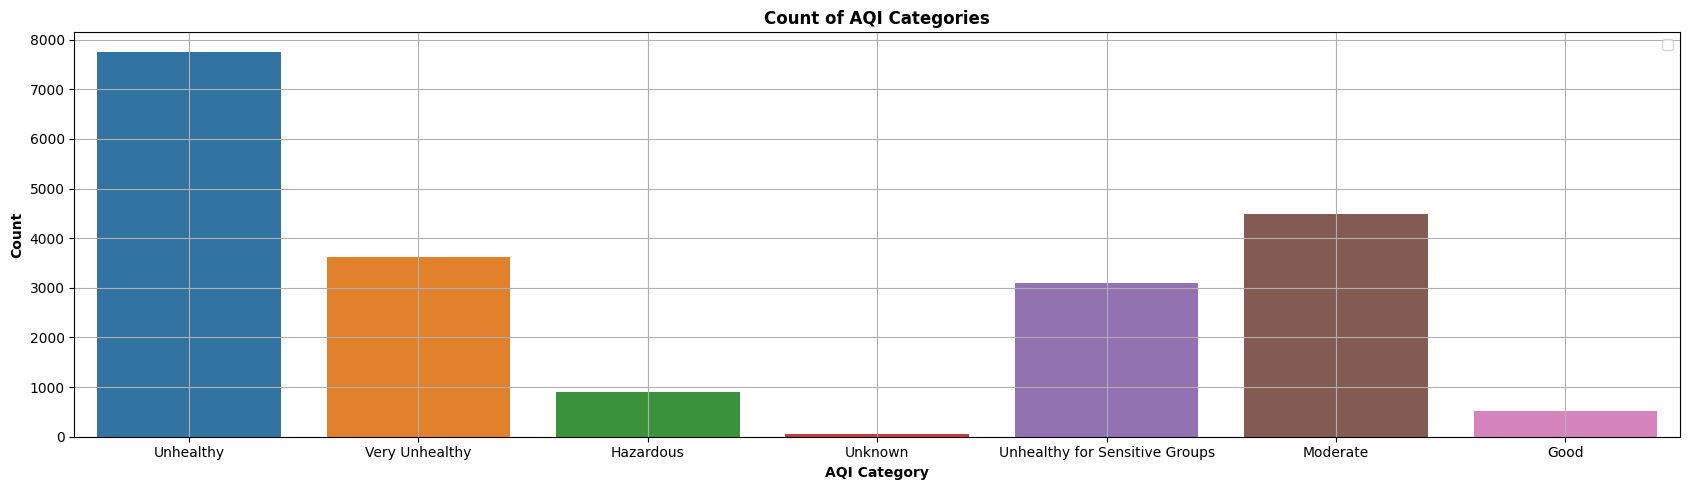

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (17,5))
sns.countplot(x=df['aqi_category'])

plt.xlabel('AQI Category', fontweight = 'bold' )
plt.ylabel('Count', fontweight = 'bold' )
plt.title('Count of AQI Categories', fontweight = 'bold' )
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We examined the AQI categories for Bangladesh over the course of **three years (2020-2022)** and discovered that the air quality did not perform as expected. Poor air quality was indicated by the constantly high **AQI levels**, especially in the unhealthy category. Additionally, moderate AQI readings were "frequently observed." Sadly, there weren't many occasions when the AQI fell into the excellent or good category, indicating that overall, the air quality wasn't ideal during this time. The environment remained gloomy, underscoring the **need** for **improved measures** to address air pollution and improve air quality for the population's welfare.



In [ ]:
main_df = df.drop(columns= ['date','conc._unit'])

In [ ]:
main_df['aqi_category'].unique()

array(['Unhealthy', 'Very Unhealthy', 'Hazardous', 'Unknown',
       'Unhealthy for Sensitive Groups', 'Moderate', 'Good'], dtype=object)

In [ ]:
main_df['aqi_le'].unique()

array([3, 6, 1, 5, 4, 2, 0])

The Label Encoding is a bit confusing on setting the ranks here so, I'll manually map it

In [ ]:
# Defining the mapping of numerical values to AQI categories
aqi_ranking = {
'Hazardous': 6,
'Very Unhealthy': 5,
'Unhealthy for Sensitive Groups': 4,
'Unhealthy': 3,
'Moderate': 2,
'Good': 1,
'Unknown': 0
}

# Create the new column 'aqi_map' and map the numerical values to AQI categories
main_df['aqi_map'] = main_df['aqi_category'].replace(aqi_ranking)
main_df[12:100:12]

,hour,nowcast_conc.,raw_conc.,aqi,aqi_category,month,day,aqi_le,aqi_map
12,14,107.1,90,178,Unhealthy,1,1,3,3
24,2,140.8,135,195,Unhealthy,1,2,3,3
36,14,194.4,192,245,Very Unhealthy,1,2,6,5
48,2,221.0,195,271,Very Unhealthy,1,3,6,5
60,14,153.5,117,204,Very Unhealthy,1,3,6,5
72,2,204.7,201,255,Very Unhealthy,1,4,6,5
84,14,199.8,189,250,Very Unhealthy,1,4,6,5
96,2,218.2,208,268,Very Unhealthy,1,5,6,5


In [ ]:
main_df = main_df.drop(columns = ['aqi_le', 'aqi_category'])
main_df

,hour,nowcast_conc.,raw_conc.,aqi,month,day,aqi_map
0,2,130.1,129,190,1,1,3
1,3,128.1,126,188,1,1,3
2,4,125.1,121,187,1,1,3
3,5,125.6,126,187,1,1,3
4,6,124.2,120,186,1,1,3
...,...,...,...,...,...,...,...
8532,20,169.2,190,220,12,31,5
8533,21,182.1,195,232,12,31,5
8534,22,195.5,209,246,12,31,5
8535,23,210.7,226,261,12,31,5


# 5 Analyze & share phase<a class= 'anchor' id = asp></a>

##  Feature Selection<a class= 'anchor' id = fs></a>

I'll use some of the methods to select the features that would provide the best patterns or insights. These would be:
- Correlation
- RFECV

###  Correlation<a class= 'anchor' id = corr></a>


In [ ]:
X= main_df.drop(columns = ['aqi_map'])
y = main_df['aqi_map']

<Axes: >

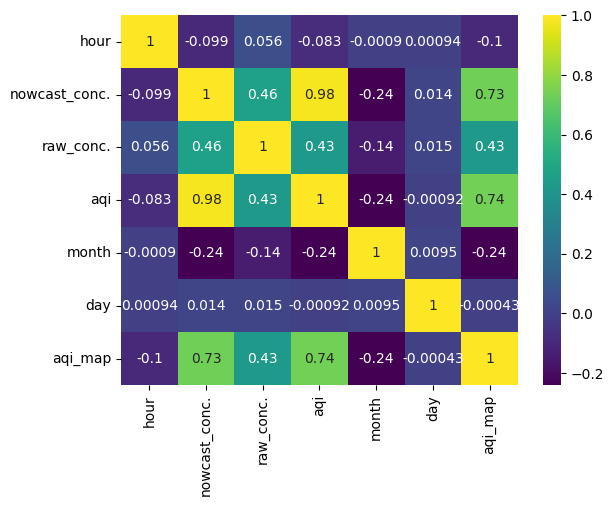

In [ ]:
sns.heatmap(main_df.corr(),annot =True, cmap = 'viridis')

Here, the columns = **'nowcast_conc.'**, **'aqi**', **'raw_conc.'** could be chosen as our selected features

### 5.1.2 RFECV<a class= 'anchor' id = rfecv></a>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfecv = RFECV(estimator = rfr, cv=5, scoring = 'r2')

In [ ]:
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestRegressor(), scoring='r2')

Once the RFECV has been run with these parameters, it will perform "recursive feature elimination with cross-validation," iteratively "removing" the "least important" "features based on the RandomForestRegressor's evaluation," and "selecting" the "best subset of features" for the specified regression problem. The results will be stored in the RFECV object, and it will be possible to retrieve them by utilizing its attributes support_, ranking_, and grid_scores_.


In [ ]:
selected_features = X_train.columns[rfecv.support_]
selected_features

Index(['nowcast_conc.'], dtype='object')

## 5.2 Ensembling(Random Forest Regressor)<a class= 'anchor' id = rfr></a>

In [ ]:
#Ensembling
# Train the RandomForestRegressor on the selected features
rfr.fit(X_train[selected_features], y_train)

#finally predict on test data
y_pred = rfr.predict(X_test[selected_features])

In [ ]:
r2_score(y_test,y_pred)

0.9999971959378358

## In this example, my regression model has an R2 of 0.999999999999, which is close to 1. Therefore, my regression model fits the data very well. It explains about 99.998 % of the dependent variable variance. This means that the model predicts the target variable almost perfectly.

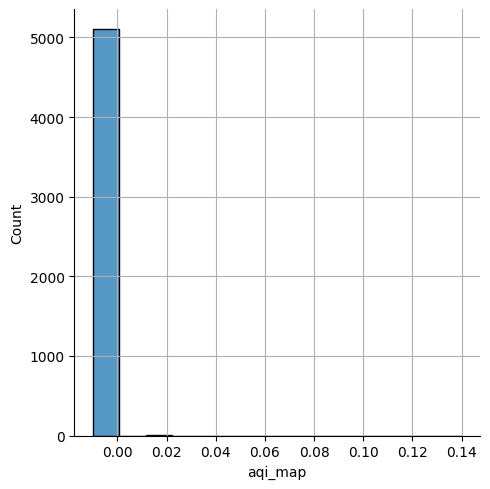

In [ ]:
#plotting
import matplotlib.pyplot as plt
sns.displot(y_test-y_pred)
plt.grid(True)
plt.savefig('fig-2.png')

DATA MODELLING


1. Extraa tress classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix :- 
[[45  3]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.96      1.00      0.98        72

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
print('Accuracy score of the  Extra Trees Classifier: ', etc_acc*100,'%')

Accuracy score of the  Extra Trees Classifier:  97.5 %


2.Stochastic Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9833333333333333 

Confusion Matrix :- 
[[46  2]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
print('Accuracy score of the  Stochastic Gradient Boosting : ', sgb_acc*100,'%')

Accuracy score of the  Stochastic Gradient Boosting :  98.33333333333333 %


3.Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[43  5]
 [ 1 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.99      0.96        72

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
print('Accuracy score of the  decision tree classifier: ', dtc_acc*100,'%')

Accuracy score of the  decision tree classifier:  95.0 %


4.LGBM classifier

In [ ]:
ind_col = [col for col in data.columns if col != 'Class']
dep_col = 'Class'

X = data[ind_col]
y = data[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.9666666666666667 

[[45  3]
 [ 1 71]]

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.99      0.97        72

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
print('Accuracy score of the  LGBMClassifier: ', lgbm_acc*100,'%')

Accuracy score of the  LGBMClassifier:  96.66666666666667 %


5.XgBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[46  2]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        72

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
print('Accuracy score of the  XgBoost: ', xgb_acc*100,'%')

Accuracy score of the  XgBoost:  98.33333333333333 %


# 6 Conclusion<a class= 'anchor' id = conc></a>

The "Bangladesh AQI Prediction" project has been successfully developed, providing a predictive model to estimate the Air Quality Index (AQI) in various locations across Bangladesh. The project includes a user-friendly website that enables individuals to input relevant parameters and obtain real-time predictions of AQI categories. By leveraging advanced machine learning techniques, such as feature selection and Random Forest Regressor, the model ensures accurate and reliable predictions.

This website is sufficient for the business purpose of predicting the AQI in the environment based on inputs like nowcast concentration and AQI, month and day values, the model generates the appropriate AQI category, which provides valuable information about air quality, whether it is classified as “Unhealthy”, “Very Unhealthy,” “Hazardous,” or “Unknown” (unhealthy for sensitive groups), “Moderate”, or “Good”

The project's availability on a public website enhances accessibility and usability, empowering users to make informed decisions and take necessary precautions based on real-time air quality information. The user-friendly interface and reliable predictions contribute to better air quality awareness and ultimately aim to improve the overall air quality conditions in Dhaka.